In [43]:
# going to import the basic packages that are necesssary for reading and visualizing the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import plotly.express as px
from textblob import Word
!pip uninstall -y numpy gensim
!pip install numpy==1.24.4 gensim==4.3.2
nltk.download('wordnet') # WordNet itself is primarily for English,

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# going to read in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Lisabyy/DS4002-CS2/refs/heads/main/Materials/RestaurantData.csv", parse_dates = ['CommentDate', 'Date'], date_parser=pd.to_datetime,infer_datetime_format=True)
df.head(11)
# okay yay the data has been read in perfectly

<ipython-input-3-ad6b2ff31638>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("https://raw.githubusercontent.com/Lisabyy/DS4002-CS2/refs/heads/main/Materials/RestaurantData.csv", parse_dates = ['CommentDate', 'Date'], date_parser=pd.to_datetime,infer_datetime_format=True)
<ipython-input-3-ad6b2ff31638>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("https://raw.githubusercontent.com/Lisabyy/DS4002-CS2/refs/heads/main/Materials/RestaurantData.csv", parse_dates = ['CommentDate', 'Date'], date_parser=pd.to_datetime,infer_datetime_format=True)


,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
5,1,2023-09-04,2023-09-17,GRANVILLE,"These five stars are for the food, service, an...","8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
6,1,2023-09-03,2023-09-17,GRANVILLE,Visited Granville for a quick lunch and had an...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
7,1,2023-09-03,2023-09-17,GRANVILLE,"Great ambience, generous portions, delicious c...","8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
8,1,2023-08-31,2023-09-17,GRANVILLE,Food was fine. Follow up service was non exist...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
9,1,2023-08-31,2023-09-17,GRANVILLE,The food was fine and the ambiance was nice. O...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$


In [4]:
# code to make a visualization of the top 20 cuisines
df_plot = df.copy()

# Split the strings in 'colB' into lists
df_plot['Style'] = df_plot['Style'].str.split(',')

# Explode 'colB' so each element gets its own row, duplicating 'colA' values
df_exploded = df_plot.explode('Style', ignore_index=True)
df_exploded.head()
#------------------------------------------------------------------------
df_exploded['Style'].str.strip().value_counts()
# Sort the DataFrame by 'Count' in descending order and take the top 20
df_style_most = df_exploded['Style'].str.strip().value_counts().reset_index()
df_style_most.columns = ['Style', 'Count']
df_style_most = df_style_most.sort_values(by='Count', ascending=False).head(20)

# Create the Plotly figure
fig = px.bar(df_style_most, x='Style', y='Count',
             title='Top 20 Styles',
             labels={'Style': 'Style', 'Count': 'Count'},
             color='Style')

# Show the figure
fig.show()

In [5]:
# first section of code to visualize mean star rating by cuisine
mean_StarRating = df_exploded.copy()

mean_StarRating.Style = mean_StarRating.Style.str.strip()
mean_StarRating.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
1,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
2,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
3,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
4,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$


In [6]:
#second section to visualize mean star rating by cuisine
mean_StarRating = mean_StarRating.groupby('Style')['StarRating'].mean().reset_index().sort_values(by="StarRating", ascending=False)
mean_StarRatingPlot = mean_StarRating.head(20)
mean_StarRatingPlot

,Style,StarRating
49,Laotian,4.900000
73,Specialty Food,4.800000
85,Ukrainian,4.800000
32,Food Stands,4.800000
86,Vegan,4.736667
38,Hawaiian,4.703226
56,Moroccan,4.700000
37,Halal,4.700000
1,African,4.700000
36,Gluten-Free,4.700000


In [7]:
# Third section to make a bar graph of the relationship between cuisine and star rating
fig = px.bar(mean_StarRatingPlot, x='Style', y='StarRating',
             title='Relationship between StarRating and Style',
             labels={'Style': 'Elements in StarRating', 'Count': 'Mean of StarRating'},
             color='Style')

# Limit the y-axis values
fig.update_yaxes(range=[4.4, 5])

# Show the figure
fig.show()

In [8]:
# first section of code to look at the relationship between resturants and their average star rating
mean_RestaurantRating = df_exploded.copy()

mean_RestaurantRating.Style = mean_RestaurantRating.Style.str.strip()
mean_RestaurantRating.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
1,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
2,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
3,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
4,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$


In [9]:
# second section of code to look at the relationship between resturants and their average star rating
mean_RestaurantRating = mean_RestaurantRating.groupby('RestaurantName')['StarRating'].mean().reset_index().sort_values(by="StarRating", ascending=False)
mean_RestaurantRatingPlot = mean_RestaurantRating.head(20)
mean_RestaurantRatingPlot

,RestaurantName,StarRating
170,Reunion Hollywood,5.0
130,Manse Korean Buffet,5.0
119,Liu's Cafe,5.0
233,hibi.,4.9
230,Yum Sະlut,4.9
215,Tita Lina’s,4.9
152,Olivia,4.9
113,Lan Noodle,4.9
41,Cooking Mom,4.9
7,Apb,4.8


In [10]:
# third section of code to look at the relationship between resturants and their average star rating
fig = px.bar(mean_RestaurantRatingPlot, x='RestaurantName', y='StarRating',
             title='Relationship between Restaurant and Average Rating',
             labels={'Style': 'Elements in StarRating', 'Count': 'Mean of StarRating'},
             color='RestaurantName')

# Limit the y-axis values
fig.update_yaxes(range=[4.4, 5])

# Show the figure
fig.show()

In [11]:
# Code to install Vader

nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
import numpy as np

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [12]:

#source:  https://hex.tech/use-cases/sentiment-analysis/vader-sentiment-analysis/#:~:text=In%20identifying%20the%20sentiment%20of,sentiment%20score%20of%20the%20text.

VaderModel = SentimentIntensityAnalyzer()
def extract_score(text):
    score = VaderModel.polarity_scores(text)
    compound = score['compound']

    sentiment = 'neutral'
    if(compound >= 0.05):
        sentiment = "positive" #Fixed indentation

    elif(compound <= -0.05):
        sentiment = "negative" #Fixed indentation

    return sentiment


In [14]:
df.dropna(inplace = True)
df.isnull().sum()

,0
Rank,0
CommentDate,0
Date,0
RestaurantName,0
Comment,0
Address,0
StarRating,0
NumberOfReviews,0
Style,0
Price,0


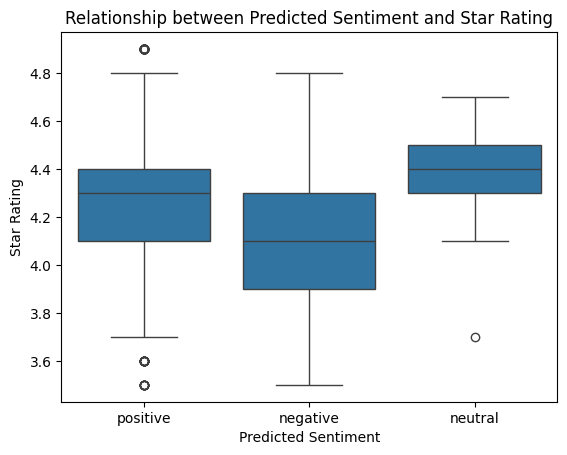

In [15]:
# Visualizing Predicted Sentiment and Star Rating
df["predicted_sentiment"] = df["Comment"].apply(extract_score) # extract score was defined in a cell above (hidden in the published app)

df.head(11)

sns.boxplot(data = df, x = "predicted_sentiment", y = "StarRating")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Star Rating")
plt.title("Relationship between Predicted Sentiment and Star Rating")
plt.show()


In [16]:
#Graphing Length of review and rating

length_Rating = df_exploded.copy()

length_Rating.Style = length_Rating.Style.str.strip()
length_Rating.head()


,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
1,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
2,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$
3,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,Cocktail Bars,$$
4,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,American (New),$$


In [17]:
df['LengthReview'] = df['Comment'].apply(len)

df.head(11)





,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price,predicted_sentiment,LengthReview
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,336
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,93
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,167
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,205
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,111
5,1,2023-09-04,2023-09-17,GRANVILLE,"These five stars are for the food, service, an...","8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,936
6,1,2023-09-03,2023-09-17,GRANVILLE,Visited Granville for a quick lunch and had an...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,541
7,1,2023-09-03,2023-09-17,GRANVILLE,"Great ambience, generous portions, delicious c...","8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,146
8,1,2023-08-31,2023-09-17,GRANVILLE,Food was fine. Follow up service was non exist...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,190
9,1,2023-08-31,2023-09-17,GRANVILLE,The food was fine and the ambiance was nice. O...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,661


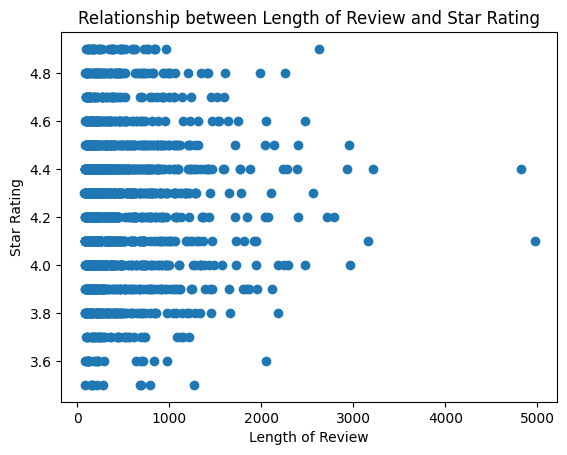

In [18]:

import matplotlib.pyplot as plt

plt.scatter(df['LengthReview'], df['StarRating'])
plt.xlabel('Length of Review')
plt.ylabel('Star Rating')
plt.title('Relationship between Length of Review and Star Rating')
plt.show()


In [19]:
#source: https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [21]:
for comment in df['Comment']:
    scores = analyzer.polarity_scores(comment)



In [23]:
for index, row in df.iterrows():
    scores = analyzer.polarity_scores(row['Comment'])
    df.loc[index, 'positive score'] = scores['pos']
    df.loc[index, 'negative score'] = scores['neg']
    df.loc[index, 'neutral score'] = scores['neu']
    df.loc[index, 'compound score'] = scores['compound']


In [ ]:
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price,predicted_sentiment,LengthReview,positive score,negative score,neutral score,compound score
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,336,0.163,0.046,0.791,0.8247
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,93,0.000,0.511,0.489,-0.9117
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,167,0.000,0.444,0.556,-0.9606
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,205,0.245,0.000,0.755,0.8555
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,111,0.480,0.000,0.520,0.8999


:

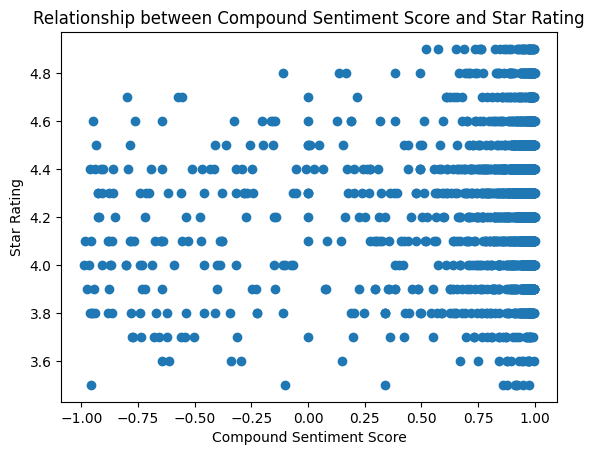

In [24]:
plt.scatter(df['compound score'], df['StarRating'])
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Star Rating')
plt.title('Relationship between Compound Sentiment Score and Star Rating')
plt.show()

In [27]:
#correlation between the sentiment compound score and the star rating
df['compound score'].corr(df['StarRating'])

np.float64(0.15840150617857876)

In [26]:
df['positive score'].corr(df['StarRating'])

np.float64(0.0631064920033238)

In [28]:
# code source: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X = df['compound score'] #in our case we are interested in making this VADER sentiment score
y = df['StarRating'] #star rating of the
# now lets attempt to split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=125
) #the test_size is 0.20 because we are interested in doing the traditional 80/20 split and the random state is set to 125 so that each iteration the data is split the exact same
# actual model building

X_train = X_train.values.reshape(-1, 1)


In [29]:
from sklearn.naive_bayes import GaussianNB
# building the classifier in the next line
model = GaussianNB()
# training the model
y_train = y_train.astype("int")
model.fit(X_train, y_train)
# Predicting Output for the 6th column
predicted = model.predict(X_test.values[6].reshape(-1,1)) # removed the square brackets
print("Actual Value:", y_test.iloc[6]) #use iloc to get the value at the 6th index
print("Predicted Value:", predicted[0])

Actual Value: 4.1
Predicted Value: 4


In [30]:
#accuracy, precision, recall

from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(X_test.values.reshape(-1, 1))
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

accuracy = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")
recall = recall_score(y_pred, y_test, average = "weighted")
precision = precision_score(y_pred, y_test, average = "weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("recall_score:", recall)
print("precision_score:", precision)



Accuracy: 0.8155619596541787
F1 Score: 0.8528756887407068
recall_score: 0.8155619596541787
precision_score: 0.899456015900233


In [31]:
#p_value test

#source: https://www.geo.fu-berlin.de/en/v/soga-r/Basics-of-statistics/Hypothesis-Tests/Inferential-Methods-in-Regression-and-Correlation/Hypothesis-Testing-About-the-Linear-Correlation-Coefficient/index.html

from scipy.stats import pearsonr

x = df['compound score']
y = df["StarRating"]

corr, p_value = pearsonr(x,y)

print("Correlation coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
     print("The correlation is not statistically significant.")


Correlation coefficient: 0.15840150617857857
P-value: 3.2422419199370803e-11
The correlation is statistically significant.


In [42]:
#LDA  #source: https://medium.com/@pinakdatta/understanding-lda-unveiling-hidden-topics-in-text-data-9bbbd25ae162
# Import necessary libraries
!pip install gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

# Sample documents

comments = df['Comment']

# Tokenize the documents
tokenized_docs = [comment.lower().split() for comment in comments]
# Create a dictionary mapping each word to a unique id
dictionary = corpora.Dictionary(tokenized_docs)
# Convert tokenized documents into bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
# Train the LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary)
# Print the topics
pprint(lda_model.print_topics())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [34]:
#keywods or review factors


import random

from sklearn.cluster import KMeans # Import kmc

# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create normalizations and add to the dataframe
df['x1'] = maxmin(df['compound score'])
df['x2'] = maxmin(df['StarRating'])
min_x1 = min(df.loc[:,'compound score'])
max_x1 = max(df.loc[:,'compound score'])
min_x2 = min(df.loc[:,'StarRating'])
max_x2 = max(df.loc[:,'StarRating'])

# Preprocess the data for scikit:
X = df.loc[ : , ['x1','x2'] ] # Select data to cluster



Text(0.5, 1.0, 'The Data')

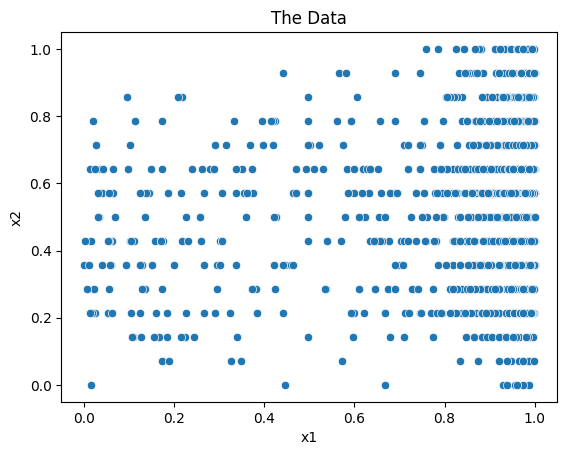

In [35]:
sns.scatterplot(data=df,x='x1',y='x2').set_title('The Data') # Plot the fake data


In [36]:
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price,predicted_sentiment,LengthReview,positive score,negative score,neutral score,compound score,x1,x2
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,336,0.163,0.046,0.791,0.8247,0.912140,0.642857
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,93,0.000,0.511,0.489,-0.9117,0.038875,0.642857
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,negative,167,0.000,0.444,0.556,-0.9606,0.014283,0.642857
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,205,0.245,0.000,0.755,0.8555,0.927630,0.642857
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$,positive,111,0.480,0.000,0.520,0.8999,0.949960,0.642857


In [37]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora

# Preprocess the text
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['cleaned'] = df['Comment'].apply(preprocess)

# Split positive and negative reviews
positive_reviews = df[df['compound score'] > 0.05]['cleaned']
negative_reviews = df[df['compound score'] < 0.05]['cleaned']

# Create dictionary and corpus for LDA
def lda_topic_modeling(review_subset, num_topics=5):
    dictionary = corpora.Dictionary(review_subset)
    corpus = [dictionary.doc2bow(text) for text in review_subset]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=42,
                                                passes=15)
    return lda_model

# Run LDA on both positive and negative reviews
lda_positive = lda_topic_modeling(positive_reviews)
lda_negative = lda_topic_modeling(negative_reviews)

# Print the topics for both sets
print("Positive Review Topics:")
print(lda_positive.print_topics())

print("Negative Review Topics:")
print(lda_negative.print_topics())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: No module named 'gensim'

In [38]:
# Extract topic keywords
def get_topic_keywords(lda_model, num_words=10):
    return [[word for word, prob in lda_model.show_topic(topic_id, topn=num_words)] for topic_id in range(lda_model.num_topics)]

positive_topics = get_topic_keywords(lda_positive)
negative_topics = get_topic_keywords(lda_negative)

# Find common keywords between positive and negative topics
common_keywords = set([word for topic in positive_topics for word in topic]) & set([word for topic in negative_topics for word in topic])

# Filter out topics containing common keywords
def filter_topics(topics, common_keywords):
    return [topic for topic in topics if not set(topic).intersection(common_keywords)]

filtered_positive_topics = filter_topics(positive_topics, common_keywords)
filtered_negative_topics = filter_topics(negative_topics, common_keywords)

# Print the filtered topics
print("Filtered Positive Review Topics:")
print(filtered_positive_topics)

print("Filtered Negative Review Topics:")
print(filtered_negative_topics)

NameError: name 'lda_positive' is not defined

In [39]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get topic words and weights
topics = lda_positive.print_topics() # Assuming you want to visualize positive topics

for topic in topics:
  topic_number, topic_words = topic
  # Remove "food" and "good" from topic_words
  topic_words = " + ".join([item for item in topic_words.split(" + ") if not any(word in item for word in ["food", "good", "great", "place", "service"])])

  wordcloud = WordCloud(background_color='white').generate_from_frequencies({word.replace('"', ''): float(weight) for weight, word in [item.rsplit('*', 1) for item in topic_words.split(' + ')]})
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Topic {topic_number}")
  plt.show()


NameError: name 'lda_positive' is not defined

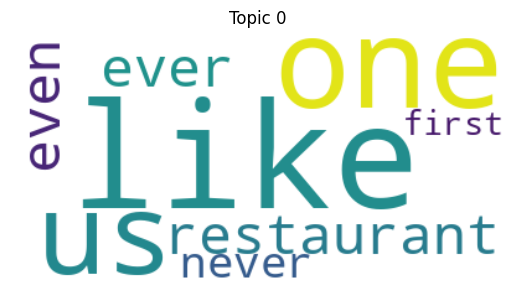

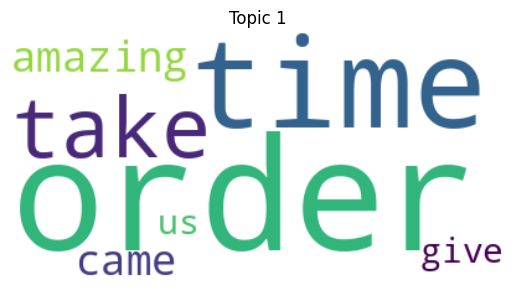

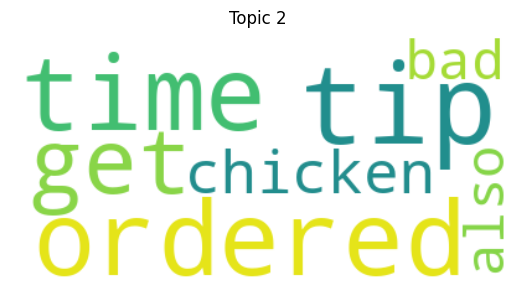

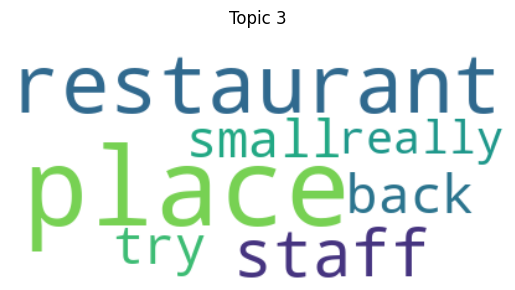

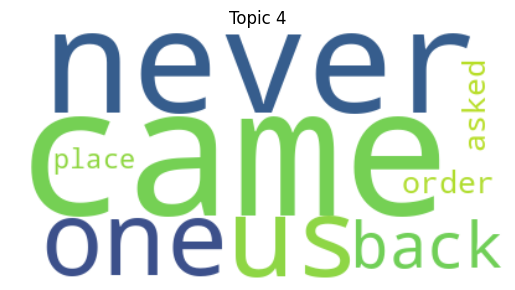

In [ ]:
#add negative

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get topic words and weights
topics = lda_negative.print_topics() # Assuming you want to visualize positive topics

for topic in topics:
  topic_number, topic_words = topic
  # Remove "food" and "good" from topic_words
  topic_words = " + ".join([item for item in topic_words.split(" + ") if not any(word in item for word in ["food", "good", "service"])])


  wordcloud = WordCloud(background_color='white').generate_from_frequencies({word.replace('"', ''): float(weight) for weight, word in [item.rsplit('*', 1) for item in topic_words.split(' + ')]})
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Topic {topic_number}")
  plt.show()

